In [1]:
import numpy as np
import sys

# sys.path.append("add/path/to/pybhjet/directory")
sys.path.append("/Users/ruby/Models/PyBHJet")

import build.pybhjet as pybhjet 
import math
from bhjet_plotting import *

import matplotlib.pyplot as plt
import ipywidgets as widgets


In [ ]:
from ipywidgets import interact, widgets, VBox, Tab, interactive_output
from IPython.display import display

bhjet = pybhjet.PyBHJet()

erg2eV = 6.242e+11 #1erg in eV
Hz2eV = 4.13566553853599e-15 # 1Hz in eV
mjy_conv = 1e26 


%matplotlib widget

This is an interactive tool to play with the parameter values of BHJet – it does not include any fitting/statistical analysis on the values that you set. Parameter values can be changed by dragging by the sliders, or directly set by clicking on their value to the right of the slider. Leave the values for infosw and EBLsw untouched. 

Output()

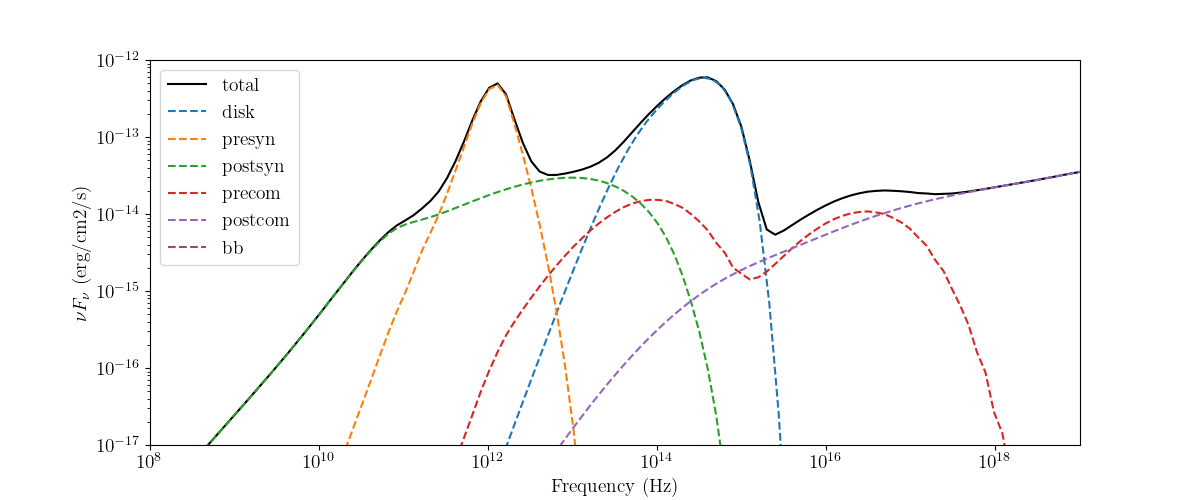

In [18]:
fig, ax = plt.subplots(figsize=(12,5))

def update_plot(Mbh, theta, dist, redsh, jetrat, r_0, z_diss, z_acc, z_max, t_e, f_nth, f_pl, pspec, 
                f_heat, f_beta, f_sc, p_beta, sig_acc, l_disk, r_in, r_out, compar1, compar2, 
                compar3, compsw, velsw, infosw, EBLsw):

    bhjet.set_parameter("Mbh", Mbh)
    bhjet.set_parameter("theta", theta)
    bhjet.set_parameter("dist", dist)
    bhjet.set_parameter("redsh", redsh)
    bhjet.set_parameter("jetrat", jetrat)
    bhjet.set_parameter("r_0", r_0)
    bhjet.set_parameter("z_diss", z_diss)
    bhjet.set_parameter("z_acc", z_acc)
    bhjet.set_parameter("z_max", z_max)
    bhjet.set_parameter("t_e", t_e)
    bhjet.set_parameter("f_nth", f_nth)
    bhjet.set_parameter("f_pl", f_pl)
    bhjet.set_parameter("pspec", pspec)
    bhjet.set_parameter("f_heat", f_heat)
    bhjet.set_parameter("f_beta", f_beta)
    bhjet.set_parameter("f_sc", f_sc)
    bhjet.set_parameter("p_beta", p_beta)
    bhjet.set_parameter("sig_acc", sig_acc)
    bhjet.set_parameter("l_disk", l_disk)
    bhjet.set_parameter("r_in", r_in)
    bhjet.set_parameter("r_out", r_out)
    bhjet.set_parameter("compar1", compar1)
    bhjet.set_parameter("compar2", compar2)
    bhjet.set_parameter("compar3", compar3)
    bhjet.set_parameter("compsw", compsw)
    bhjet.set_parameter("velsw", velsw)
    bhjet.set_parameter("infosw", infosw)
    bhjet.set_parameter("EBLsw", EBLsw)

    bhjet.run()
    output = bhjet.get_output()

    #----- Component Plotting -----

    ax.cla()
    E_total, F_E_total = np.array([[datapoint.energy, datapoint.flux] for datapoint in output.total]).T
    ax.loglog(E_total, E_total*F_E_total/mjy_conv, c="k", label="total")

    for component in ["disk", "presyn", "postsyn", "precom", "postcom", "bb"]:
        E, F_E = np.array([[datapoint.energy, datapoint.flux] for datapoint in getattr(output, component)]).T
        ax.loglog(E, E*F_E/mjy_conv, ls="--", label=component)

    # ax.set_ylabel(r"$\nu F_{\nu}$ (erg/s/cm$^{2}$)", fontsize=14)

    ax.set_ylabel("$\\nu F_\\nu$ (erg/cm2/s)")
    ax.set_xlabel("Frequency (Hz)", fontsize=14)

    ax.set_xlim(1e8, 1e19)
    ax.set_ylim(1e-17, 1e-12)

    ax.legend()


#------ Slider Set Up ------

param_groups = {
    "Physical Properties": [
        widgets.FloatLogSlider(value=1e8, min=6, max=10, step=0.1, description='Mbh'),
        widgets.FloatSlider(value=66, min=0, max=90, step=1, description='theta'),
        widgets.FloatLogSlider(value=9080, min=3, max=5, step=0.1, description='dist'),
        widgets.FloatSlider(value=0.003633, min=0, max=0.01, step=0.0001, description='redsh', readout_format='.5f')
    ],
    "Jet Base Properties": [
        widgets.FloatSlider(value=7.72058, min=1, max=20, step=0.1, description='r_0'),
        widgets.FloatSlider(value=655.986, min=100, max=1000, step=10, description='t_e'),
        widgets.FloatSlider(value=0.00064, min=1e-6, max=0.01, step=0.0001, description='jetrat', readout_format='.5f'),
        widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='p_beta'),
    ],
    "Outer Jet Properties": [
        widgets.IntSlider(value=6, min=2, max=15, step=1, description='velsw'),
        widgets.FloatSlider(value=0.01, min=0, max=0.1, step=0.01, description='sig_acc'),
        widgets.FloatSlider(value=24.971, min=10, max=100, step=1, description='z_diss'),
        widgets.FloatSlider(value=24.971, min=10, max=100, step=1, description='z_acc'),
        widgets.IntSlider(value=100000, min=1000, max=200000, step=1000, description='z_max')
    ],
    "Energy Distribution": [
        widgets.FloatSlider(value=1.5, min=1, max=3, step=0.1, description='pspec'),
        widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='f_nth'),
        widgets.FloatSlider(value=4.67634, min=1, max=10, step=0.1, description='f_pl'),
        widgets.FloatSlider(value=16.247, min=1, max=20, step=0.1, description='f_heat'),
        widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='f_beta'),
        widgets.FloatLogSlider(value=7.98968e-09, min=-10, max=-5, step=0.1, description='f_sc')
    ],
    "Disk Parameters": [
        widgets.FloatLogSlider(value=2.3e-06, min=-6, max=-3, step=0.1, description='l_disk'),
        widgets.IntSlider(value=20, min=1, max=200, step=1, description='r_in'),
        widgets.IntSlider(value=1000, min=1, max=500, step=1, description='r_out')
    ],
    "Addt. Blackbody": [
        widgets.FloatSlider(value=2736.15, min=1000, max=5000, step=10, description='compar1'),
        widgets.FloatLogSlider(value=1.69379e+37, min=35, max=40, step=0.1, description='compar2'),
        widgets.FloatLogSlider(value=3e-10, min=-12, max=-8, step=0.1, description='compar3'),
        widgets.IntSlider(value=0, min=0, max=2, step=1, description='compsw'),
        widgets.IntSlider(value=1, min=1, max=2, step=1, description='infosw'),
        widgets.IntSlider(value=0, min=0, max=1, step=1, description='EBLsw')
    ]
}

ax.grid(alpha=0.3)

tab = Tab()
tab_children = []
tab_titles = []

for title, widget_list in param_groups.items():
    tab_children.append(VBox(widget_list))
    tab_titles.append(title)

tab.children = tab_children
for i, title in enumerate(tab_titles):
    tab.set_title(i, title)

display(tab)

flat_widgets = {w.description: w for group in param_groups.values() for w in group}

output = interactive_output(update_plot, flat_widgets)
display(output)